<a href="https://colab.research.google.com/github/HagerDakroury/handwritten-digits-classification/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


#mounting my google drive where the dataset is saved
# from google.colab import drive
# drive.mount('/content/drive')

#extracting the dataset
!tar xvzf /content/drive/MyDrive/trainingSet.tar.gz




In [2]:
def Load_data(directory):
  #fitting the data into a dataset
  #image_size=(28,28)
  #training to validation ratio 8:2
  #seed is random

  #the training dataset
  t_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      directory, labels='inferred',label_mode='categorical',color_mode='rgb',
      batch_size=32, image_size=(28,28), validation_split=0.2,
      subset="training",seed=387
  )

  #the validation dataset 
  v_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      directory, labels='inferred',label_mode='categorical', color_mode='rgb',
      batch_size=32, image_size=(28,28), validation_split=0.2,
      subset="validation",seed=387
  )

  #preprocessing the dataset

  #1.reshaping to a single


  return t_dataset,v_dataset



In [ ]:

import numpy as np

t_dataset,v_dataset=Load_data("/content/trainingSet")
from keras.optimizers import SGD


#keeping the data into memory after they're loaded to avoid I/O blocking 
AUTOTUNE = tf.data.AUTOTUNE
t_ds = t_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
v_ds = v_dataset.cache().prefetch(buffer_size=AUTOTUNE)

#resclaing the dataset
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

t_ds = t_ds.map(lambda x, y: (normalization_layer(x), y))
v_ds = v_ds.map(lambda x, y: (normalization_layer(x), y))


model = Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
  layers.Dense(10, activation='softmax')
])

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs=10
history = model.fit(
  t_ds,
  validation_data=v_ds,
  epochs=epochs
)


> 98.571


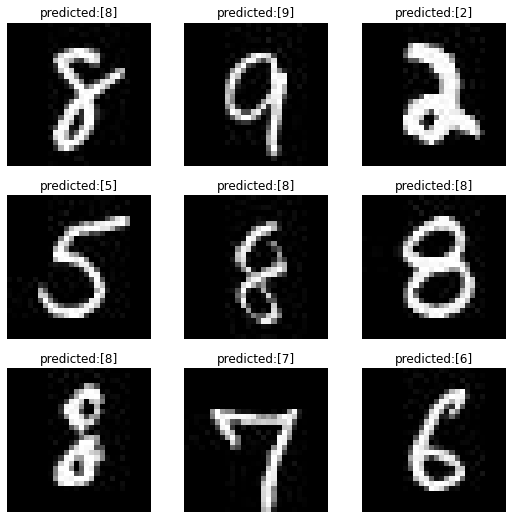

In [6]:
#checking accuracy
val_acc = history.history['val_accuracy']
print('> %.3f' % (val_acc[9] * 100.0))

t_ds_batch=t_ds.batch(3)
# list(t_ds_batch.as_numpy_iterator())
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
class_names = t_dataset.class_names 
plt.figure(figsize=(9, 9))
for images, labels in t_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #predicting the image 
        img=images[i]
        img = img_to_array(img)
        img = img.reshape(1, 28, 28, 3)
        img = img.astype('float32')
        img = img / 255.0
        predict=np.argmax(model.predict(img),axis=-1)
        plt.title("predicted:"+np.array_str(predict))

        plt.axis("off")